In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn 

## Verisetlerinin okunarak düzenlemelerin yapılması:

In [2]:
data = pd.read_csv("understat.com.csv", delimiter=",")  # Ana kullanacağımız veri setimize başka bir veri setinden
                                                        # öznitelik eklemek istiyoruz.Bunun için 2 veri setini de okuyoruz.
data2 = pd.read_csv("Big_5_European_football_leagues_teams_stats.csv", delimiter=",") 

In [3]:
data.rename(columns={"Unnamed: 0":"league"}, inplace=True)  # Sutün isimlerinde gerekli düzenleme ve 
data.rename(columns={"Unnamed: 1":"year"}, inplace=True)    # isimlendirme işlemlerini yapıyoruz
data.rename(columns={"missed":"conceded"}, inplace=True)

In [4]:
pd.set_option("display.max_rows", None)     # Veriyi daha detaylı inceleyebilmek adına tüm satır/sütunları yazdırıyoruz
pd.set_option("display.max_columns", None)

In [5]:
data=data[data.league != "RFPL"]  # Verimizdeki Rusya futbol ligini çıkarıp, Avrupanın 5 büyük ligini ele alıyoruz.

In [6]:
data = data.drop(columns="wins")    # Gerekli olmayan öznitelikleri çıkarıyoruz
data = data.drop(columns="draws")
data = data.drop(columns="loses")

2. verisetimiz ile ilgili işlemler:

In [7]:
data2=data2[data2.season.isin(["2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020"])]

In [8]:
data2.rename(columns = {"season":"year", "squad":"team", "competition":"league"}, inplace=True)

In [9]:
data2["year"].replace({"2014-2015":2015, "2015-2016":2016, "2016-2017":2017, "2017-2018":2018, 
                        "2018-2019":2019, "2019-2020":2020}, inplace=True)

data2["league"].replace({"Premier League":"EPL", "Ligue 1":"Ligue_1", "Fußball-Bundesliga":"Bundesliga", 
                              "Serie A":"Serie_A", "La Liga":"La_liga"}, inplace=True)

In [10]:
data2=data2.loc[:,["league","year", "team", "goal_diff", "assists", "pens_made", "pens_att", "shots_on_target"
                   , "shots_on_target_against", "saves", "clean_sheets", "players_used", "games_subs", 
                   "points_per_match"]]

2. verisetinde hataya sebep olan aynı takımın farklı isimlendirilmesi durumlarını düzeltiyoruz:

In [11]:
data2["team"].replace({"Málaga":"Malaga", "La Coruña":"Deportivo La Coruna", "Almería":"Almeria",   
                      "Córdoba":"Cordoba", "Atlético Madrid":"Atletico Madrid", "Betis":"Real Betis", 
                      "Sporting Gijón":"Sporting Gijon", "Alavés":"Alaves", "Leganés":"Leganes", 
                      "Valladolid":"Real Valladolid", "Huesca":"SD Huesca"}, inplace=True)         # La liga isim düzenlemeleri

data2["team"].replace({"Manchester Utd":"Manchester United", "Swansea City":"Swansea", "Stoke City":"Stoke", 
                       "West Brom":"West Bromwich Albion", "Leicester City":"Leicester",      
                       "Newcastle Utd":"Newcastle United", "Hull City":"Hull", 
                      "QPR":"Queens Park Rangers", "Norwich City":"Norwich", 
                      "Wolves":"Wolverhampton Wanderers", "Cardiff City":"Cardiff", 
                      "Sheffield Utd":"Sheffield United"}, inplace=True)                 # EPL isim düzenlemeleri

data2["team"].replace({"Paris S-G":"Paris Saint Germain", "Saint-Étienne":"Saint-Etienne", 
                      "Bastia":"SC Bastia", "Evian":"Evian Thonon Gailland", 
                      "Gazélec Ajaccio":"GFC Ajaccio", "Nîmes":"Nimes"}, inplace=True)    # Ligue-1 isim düzenlemeleri

data2["team"].replace({"M'Gladbach":"Borussia M.Gladbach", "Leverkusen":"Bayer Leverkusen", 
                       "Dortmund":"Borussia Dortmund", "Eint Frankfurt":"Eintracht Frankfurt", 
                      "Köln":"FC Cologne", "Stuttgart":"VfB Stuttgart", "Hertha BSC":"Hertha Berlin", 
                      "Paderborn 07":"Paderborn", "RB Leipzig":"RasenBallsport Leipzig",
                      "Düsseldorf":"Fortuna Duesseldorf", "Nürnberg":"Nuernberg"}, inplace=True) # Bundesliga isim düzenlemeleri

data2["team"].replace({"Milan":"AC Milan", "Hellas Verona":"Verona", "SPAL":"SPAL 2013", 
                      "Parma":"Parma Calcio 1913"}, inplace=True)                      # Serie-A isim düzenlemeleri

## Ana verisetimiz ile 2. verisetimizi birleştiriyoruz:

In [12]:
# 2 verisetindeki aynı yıla denk gelen ama farklı ifade edilmiş olan sezonları denkleştiriyoruz:
data["year"].replace({2014:2015, 2015:2016, 2016:2017, 2017:2018, 2018:2019, 2019:2020}, inplace=True) 

In [13]:
data=pd.merge(data, data2, on=["year", "team"])   # Daha kapsamlı olan yeni verisetimizi elde ediyoruz.

In [14]:
data.rename(columns={"league_x":"league"}, inplace=True)

In [15]:
#Verisetimizi amacımıza uygun şekilde gerekli alt verisetlerine bölüyoruz:

data_int = data.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32]] 

data_x = data_int.drop(columns="pts")

train_data = data_x.loc[(data['year'] >= 2015) & (data['year'] <= 2019)]
test_data = data_x.loc[(data['year'] == 2020)]

train_target = data_int.loc[(data['year'] >= 2015) & (data['year'] <= 2019)].pts
test_target = data_int.loc[(data['year'] == 2020) ].pts

In [16]:
data

,league,year,position,team,matches,scored,conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,league_y,goal_diff,assists,pens_made,pens_att,shots_on_target,shots_on_target_against,saves,clean_sheets,players_used,games_subs,points_per_match
0,La_liga,2015,1,Barcelona,38,110,21,94,102.980152,-7.019848,97.777212,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813,La_liga,89,79,6,7,291,91,70,23,24,107,2.47
1,La_liga,2015,2,Real Madrid,38,118,38,92,95.766243,-22.233757,86.103895,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511,La_liga,80,91,11,13,306,132,94,15,24,111,2.42
2,La_liga,2015,3,Atletico Madrid,38,67,29,78,57.047670,-9.952330,52.588008,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647,La_liga,38,48,5,6,197,95,66,19,25,107,2.05
3,La_liga,2015,4,Valencia,38,70,32,77,55.062500,-14.937500,49.703978,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932,La_liga,38,48,5,7,171,125,93,13,24,112,2.03
4,La_liga,2015,5,Sevilla,38,71,45,76,69.526624,-1.473376,62.094599,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133,La_liga,26,45,8,10,200,146,101,14,26,114,2.00
5,La_liga,2015,6,Villarreal,38,48,37,60,56.767999,8.767999,55.281438,40.701813,3.701813,38.471977,16.809461,10.072085,8.679660,242,171,62.7363,2.7363,La_liga,11,34,2,2,190,141,104,16,28,112,1.58
6,La_liga,2015,7,Athletic Club,38,42,41,55,45.542151,3.542151,41.826151,44.106707,3.106707,41.737161,0.088990,7.462406,9.403965,183,171,53.3585,-1.6415,La_liga,1,26,5,5,153,140,99,14,26,112,1.45
7,La_liga,2015,8,Celta Vigo,38,47,44,51,58.887332,11.887332,54.427664,51.777138,7.777138,46.574205,7.853459,6.056173,10.882769,287,207,55.0488,4.0488,La_liga,3,33,4,6,177,148,104,10,23,110,1.34
8,La_liga,2015,9,Malaga,38,42,48,50,46.221008,4.221008,40.878338,54.130818,6.130818,49.515437,-8.637099,7.792069,7.019068,184,184,48.5128,-1.4872,La_liga,-6,27,4,7,177,152,104,10,23,112,1.32
9,La_liga,2015,10,Rayo Vallecano,38,46,68,49,47.790696,1.790696,45.560868,70.433460,2.433460,65.973800,-20.412932,6.157978,9.735109,147,219,43.5455,-5.4545,La_liga,-22,33,2,3,176,180,112,10,28,110,1.29


## "Scale" işlemleri için gerekli tanımlamalar:

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

scaled_data = sc.fit_transform(data_int)

In [19]:
scaled_train_data = sc.fit_transform(train_data)
scaled_test_data = sc.transform(test_data)

# "MLP" Classifier

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
model_mlp = MLPClassifier(max_iter=10000, solver='adam', random_state=5)

model_mlp.fit(train_data,train_target)

MLPClassifier(max_iter=10000, random_state=5)

In [22]:
mlp_result = model_mlp.predict(test_data)            #Modelimizin tahminlemesine göz atıyoruz.

mlp_result

array([87, 80, 69, 49, 49, 49, 49, 49, 49, 49, 51, 49, 51, 51, 49, 49, 49,
       50, 25, 39, 93, 93, 67, 76, 72, 49, 45, 49, 45, 38, 43, 49, 25, 38,
       49, 43, 25, 38, 38, 25, 93, 92, 72, 60, 72, 49, 69, 47, 47, 49, 36,
       38, 49, 36, 49, 36, 36, 25, 87, 72, 72, 72, 72, 72, 67, 72, 49, 43,
       39, 49, 49, 39, 39, 47, 34, 25, 25, 25, 58, 58, 58, 58, 58, 58, 58,
       58, 58, 58, 58, 58, 58, 58, 58, 38, 58, 38, 38, 36], dtype=int64)

In [23]:
laliga_mlp_result = mlp_result[:20]     #Elde ettiğimiz sonuçları liglere göre ayırıyoruz.
epl_mlp_result = mlp_result[20:40]
bundesliga_mlp_result = mlp_result[40:58]
serieA_mlp_result = mlp_result[58:78]
ligue1_mlp_result = mlp_result[78:98]

In [24]:
laliga_teams = data.loc[(data['year'] == 2020 ) & (data['league'] == "La_liga")].team     # Her ligden amacımıza yönelik gerekli
laliga_real_points = data.loc[(data["year"]==2020) & (data["league"]=="La_liga")].pts     # verileri ayırıyoruz.
laliga_real_positions=data.loc[(data["year"]==2020) & (data["league"]=="La_liga")]["position"]

epl_teams = data.loc[(data['year'] == 2020 ) & (data['league'] == "EPL")].team
epl_real_points = data.loc[(data["year"]==2020) & (data["league"]=="EPL")].pts
epl_real_positions=data.loc[(data["year"]==2020) & (data["league"]=="EPL")]["position"]

bundesliga_teams = data.loc[(data['year'] == 2020 ) & (data['league'] == "Bundesliga")].team
bundesliga_real_points = data.loc[(data["year"]==2020) & (data["league"]=="Bundesliga")].pts
bundesliga_real_positions=data.loc[(data["year"]==2020) & (data["league"]=="Bundesliga")]["position"]

serieA_teams = data.loc[(data['year'] == 2020 ) & (data['league'] == "Serie_A")].team
serieA_real_points = data.loc[(data["year"]==2020) & (data["league"]=="Serie_A")].pts
serieA_real_positions=data.loc[(data["year"]==2020) & (data["league"]=="Serie_A")]["position"]

ligue1_teams = data.loc[(data['year'] == 2020 ) & (data['league'] == "Ligue_1")].team
ligue1_real_points = data.loc[(data["year"]==2020) & (data["league"]=="Ligue_1")].pts
ligue1_real_positions=data.loc[(data["year"]==2020) & (data["league"]=="Ligue_1")]["position"] 

In [25]:
# Tahminlenen ve gerçekte gözlemlenen sonuçlar arasındaki benzerlikleri görebilmek adına yeni bir dataframe oluşturuyoruz.
# Bu yöntemde Serie-A ligini ele alıyoruz

serieA_mlp_df={"team": serieA_teams, "PredictedPoints":serieA_mlp_result, 
                   "RealPoints":serieA_real_points, "RealPositions":serieA_real_positions} 

serieA_mlp_df=pd.DataFrame(serieA_mlp_df)

serieA_mlp_df.sort_values(by="PredictedPoints", ascending=False, inplace=True)

serieA_mlp_df.reset_index(inplace=True)
serieA_mlp_df.drop(columns="index", inplace=True)

In [26]:
list1=[0]*20
for i in range(20):
    list1[i]=i+1
list1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [27]:
serieA_mlp_df.insert(0, "PredictedPosition", list1)

In [28]:
serieA_mlp_df         # Yeni oluşturduğumuz tahminlenen ve gerçekte olan sonuçları gösteren dataframe'imize göz atıyoruz.

,PredictedPosition,team,PredictedPoints,RealPoints,RealPositions
0,1,Juventus,87,83,1
1,2,Lazio,72,78,3
2,3,Atalanta,72,78,4
3,4,Roma,72,70,5
4,5,AC Milan,72,66,6
5,6,Sassuolo,72,51,8
6,7,Inter,72,82,2
7,8,Napoli,67,62,7
8,9,Verona,49,49,9
9,10,Parma Calcio 1913,49,46,12


In [29]:
# Serie-A için MLP modelin puanlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(serieA_real_points, serieA_mlp_result), recall_score(serieA_real_points, serieA_mlp_result, average="micro"), precision_score(serieA_real_points, serieA_mlp_result, average="micro")

(0.1, 0.1, 0.1)

In [30]:
# Seria-A için MLP modelin pozisyonlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(serieA_mlp_df["RealPositions"], serieA_mlp_df["PredictedPosition"] ), recall_score(serieA_mlp_df["RealPositions"], serieA_mlp_df["PredictedPosition"], average="micro"), precision_score(serieA_mlp_df["RealPositions"], serieA_mlp_df["PredictedPosition"], average="micro")

(0.3, 0.3, 0.3)

In [31]:
# Tüm ligler için MLP modelin puanlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(test_target, mlp_result), recall_score(test_target, mlp_result, average="micro"), precision_score(test_target, mlp_result, average="micro")

(0.07142857142857142, 0.07142857142857142, 0.07142857142857142)

Text(69.0, 0.5, 'Actual')

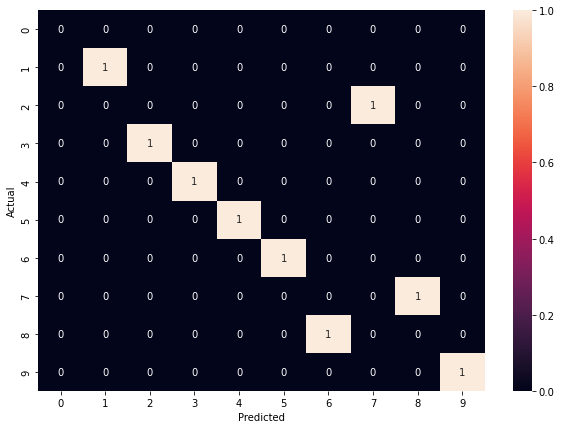

In [32]:
cm_mlp = confusion_matrix(serieA_mlp_df["RealPositions"], serieA_mlp_df["PredictedPosition"], labels=np.arange(0,10))
plt.figure(figsize=(10,7))
sn.heatmap(cm_mlp, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Scale edilmiş verilerle MLP Classifier

In [33]:
scaled_mlp = MLPClassifier(max_iter=10000,solver="adam", random_state=5)

scaled_mlp.fit(scaled_train_data, train_target)

MLPClassifier(max_iter=10000, random_state=5)

In [34]:
scaled_mlp_result = scaled_mlp.predict(scaled_test_data)

scaled_mlp_result        #Modelimizin tahminlemesine göz atıyoruz.

array([72, 72, 59, 69, 66, 55, 55, 55, 50, 50, 53, 50, 50, 47, 41, 41, 41,
       41, 39, 36, 79, 66, 59, 59, 68, 61, 57, 61, 54, 50, 43, 50, 44, 43,
       41, 41, 41, 33, 34, 32, 84, 55, 69, 66, 53, 53, 51, 52, 43, 43, 41,
       43, 44, 33, 36, 36, 36, 28, 66, 66, 66, 72, 66, 66, 69, 53, 52, 52,
       52, 53, 52, 46, 44, 38, 45, 38, 25, 22, 64, 55, 49, 49, 43, 49, 43,
       41, 41, 43, 43, 43, 43, 43, 41, 33, 36, 36, 36, 36], dtype=int64)

In [35]:
laliga_sc_mlp_result = scaled_mlp_result[:20]     #Elde ettiğimiz sonuçları liglere göre ayırıyoruz.
epl_sc_mlp_result = scaled_mlp_result[20:40]
bundesliga_sc_mlp_result = scaled_mlp_result[40:58]
serieA_sc_mlp_result = scaled_mlp_result[58:78]
ligue1_sc_mlp_result = scaled_mlp_result[78:98]

In [36]:
# Tahminlenen ve gerçekte gözlemlenen sonuçlar arasındaki benzerlikleri görebilmek adına yeni bir dataframe oluşturuyoruz.
# Bu yöntemde Bundesliga ligini ele alıyoruz

bundesliga_sc_mlp_df={"team": bundesliga_teams, "PredictedPoints":bundesliga_sc_mlp_result, 
                   "RealPoints":bundesliga_real_points, "RealPositions":bundesliga_real_positions} 

bundesliga_sc_mlp_df=pd.DataFrame(bundesliga_sc_mlp_df)

bundesliga_sc_mlp_df.sort_values(by="PredictedPoints", ascending=False, inplace=True)

bundesliga_sc_mlp_df.reset_index(inplace=True)
bundesliga_sc_mlp_df.drop(columns="index", inplace=True)

In [37]:
list2=[0]*18
for i in range(18):
    list2[i]=i+1
list2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [38]:
bundesliga_sc_mlp_df.insert(0, "PredictedPosition", list2)

In [39]:
bundesliga_sc_mlp_df         # Yeni oluşturduğumuz tahminlenen ve gerçekte olan sonuçları gösteren dataframe'imize göz atıyoruz.

,PredictedPosition,team,PredictedPoints,RealPoints,RealPositions
0,1,Bayern Munich,84,82,1
1,2,RasenBallsport Leipzig,69,66,3
2,3,Borussia M.Gladbach,66,65,4
3,4,Borussia Dortmund,55,69,2
4,5,Bayer Leverkusen,53,63,5
5,6,Hoffenheim,53,52,6
6,7,Freiburg,52,48,8
7,8,Wolfsburg,51,49,7
8,9,Mainz 05,44,37,13
9,10,Schalke 04,43,39,12


In [40]:
# Bundesliga için Scaled MLP modelin puanlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(bundesliga_real_points, bundesliga_sc_mlp_result), recall_score(bundesliga_real_points, bundesliga_sc_mlp_result, average="micro"), precision_score(bundesliga_real_points, bundesliga_sc_mlp_result, average="micro")

(0.1111111111111111, 0.1111111111111111, 0.1111111111111111)

In [41]:
# Bundesliga için Scaled MLP modelin pozisyonlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(bundesliga_sc_mlp_df["RealPositions"], bundesliga_sc_mlp_df["PredictedPosition"] ), recall_score(bundesliga_sc_mlp_df["RealPositions"], bundesliga_sc_mlp_df["PredictedPosition"], average="micro"), precision_score(bundesliga_sc_mlp_df["RealPositions"], bundesliga_sc_mlp_df["PredictedPosition"], average="micro")

(0.2222222222222222, 0.2222222222222222, 0.2222222222222222)

In [42]:
# Tüm ligler için Scaled MLP modelin doğruluk değerlerinin ölçülmesi
accuracy_score(test_target, scaled_mlp_result), recall_score(test_target, scaled_mlp_result, average="micro"), precision_score(test_target, scaled_mlp_result, average="micro")

(0.11224489795918367, 0.11224489795918367, 0.11224489795918367)

Text(69.0, 0.5, 'Actual')

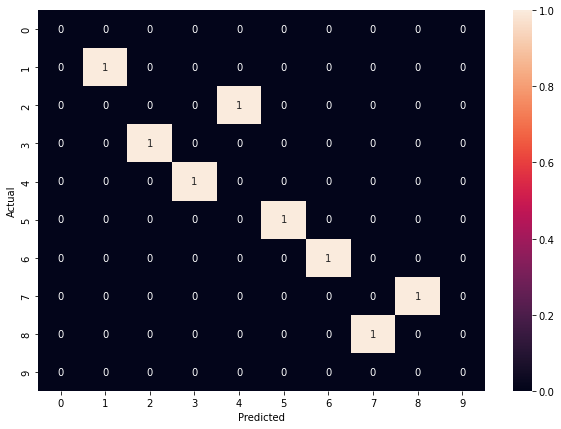

In [43]:
cm_mlp = confusion_matrix(bundesliga_sc_mlp_df["RealPositions"], bundesliga_sc_mlp_df["PredictedPosition"], labels=np.arange(0,10))
plt.figure(figsize=(10,7))
sn.heatmap(cm_mlp, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [45]:
model_forest = RandomForestClassifier()
model_forest.fit(train_data, train_target)

RandomForestClassifier()

In [46]:
forest_result = model_forest.predict(test_data) # Modelimizin tahminlemesine göz atıyoruz

forest_result

array([87, 79, 70, 69, 59, 55, 55, 55, 52, 50, 50, 49, 42, 41, 41, 39, 37,
       36, 33, 29, 93, 91, 72, 63, 63, 52, 55, 52, 50, 54, 49, 50, 43, 43,
       41, 39, 32, 33, 33, 22, 91, 76, 75, 72, 66, 52, 57, 52, 50, 43, 43,
       43, 41, 41, 39, 34, 34, 21, 77, 79, 76, 77, 72, 59, 55, 53, 50, 50,
       47, 49, 45, 41, 45, 39, 39, 26, 26, 20, 88, 63, 63, 63, 50, 51, 51,
       49, 51, 50, 51, 50, 50, 45, 45, 41, 36, 33, 33, 20], dtype=int64)

In [47]:
laliga_rf_result = forest_result[:20]     #Elde ettiğimiz sonuçları liglere göre ayırıyoruz.
epl_rf_result = forest_result[20:40]
bundesliga_rf_result = forest_result[40:58]
serieA_rf_result = forest_result[58:78]
ligue1_rf_result = forest_result[78:98]

In [48]:
# Tahminlenen ve gerçekte gözlemlenen sonuçlar arasındaki benzerlikleri görebilmek adına yeni bir dataframe oluşturuyoruz.
# Bu yöntemde EPL ligini ele alıyoruz

epl_rf_df={"team": epl_teams, "PredictedPoints":epl_rf_result, 
                   "RealPoints":epl_real_points, "RealPositions":epl_real_positions} 

epl_rf_df=pd.DataFrame(epl_rf_df)

epl_rf_df.sort_values(by="PredictedPoints", ascending=False, inplace=True)

epl_rf_df.reset_index(inplace=True)
epl_rf_df.drop(columns="index", inplace=True)

In [49]:
list1=[0]*20
for i in range(20):
    list1[i]=i+1
list1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [50]:
epl_rf_df.insert(0, "PredictedPosition", list1)

In [51]:
epl_rf_df         # Yeni oluşturduğumuz tahminlenen ve gerçekte olan sonuçları gösteren dataframe'imize göz atıyoruz.

,PredictedPosition,team,PredictedPoints,RealPoints,RealPositions
0,1,Liverpool,93,99,1
1,2,Manchester City,91,81,2
2,3,Manchester United,72,66,3
3,4,Chelsea,63,66,4
4,5,Leicester,63,62,5
5,6,Wolverhampton Wanderers,55,59,7
6,7,Sheffield United,54,54,10
7,8,Tottenham,52,59,6
8,9,Arsenal,52,56,8
9,10,Everton,50,49,12


In [52]:
# EPL için Random Forest modelin puanlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(epl_real_points, epl_rf_result), recall_score(epl_real_points, epl_rf_result, average="micro"), precision_score(epl_real_points, epl_rf_result, average="micro")

(0.2, 0.2, 0.2)

In [53]:
# EPL için Random Forest modelin pozisyonlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(epl_rf_df["RealPositions"], epl_rf_df["PredictedPosition"] ), recall_score(epl_rf_df["RealPositions"], epl_rf_df["PredictedPosition"], average="micro"), precision_score(epl_rf_df["RealPositions"], epl_rf_df["PredictedPosition"], average="micro")

(0.5, 0.5, 0.5)

In [54]:
# Tüm ligler için Random Forest modelin puanlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(test_target, forest_result), recall_score(test_target, forest_result, average="micro"), precision_score(test_target, forest_result, average="micro")

(0.17346938775510204, 0.17346938775510204, 0.17346938775510204)

Text(69.0, 0.5, 'Actual')

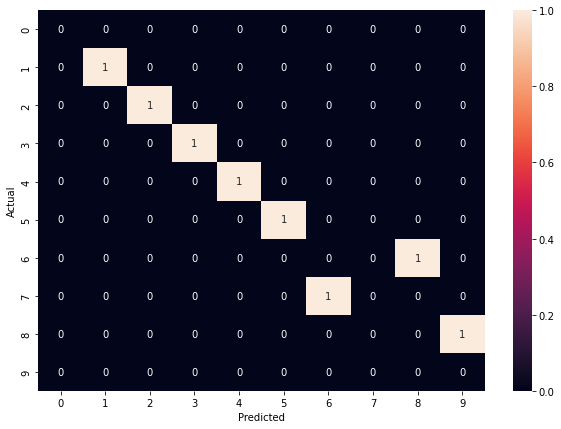

In [55]:
cm_mlp = confusion_matrix(epl_rf_df["RealPositions"], epl_rf_df["PredictedPosition"], labels=np.arange(0,10))
plt.figure(figsize=(10,7))
sn.heatmap(cm_mlp, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Random Forest with Cross Validation

In [56]:
model_forest_cross = RandomForestClassifier()
cross_validate(model_forest_cross, train_data, train_target, cv=10, scoring=['accuracy', 'recall_micro', 'precision_weighted'], n_jobs=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


{'fit_time': array([0.56097937, 0.75842571, 0.53267169, 0.5468049 , 0.522681  ,
        0.77348709, 0.70104671, 0.68025231, 0.75446248, 0.50506806]),
 'score_time': array([0.09669805, 0.02711439, 0.03219271, 0.08257389, 0.04627991,
        0.0262754 , 0.03029418, 0.01805186, 0.02732491, 0.01323843]),
 'test_accuracy': array([0.40816327, 0.42857143, 0.36734694, 0.26530612, 0.14583333,
        0.25      , 0.22916667, 0.25      , 0.375     , 0.39583333]),
 'test_recall_micro': array([0.40816327, 0.42857143, 0.36734694, 0.26530612, 0.14583333,
        0.25      , 0.22916667, 0.25      , 0.375     , 0.39583333]),
 'test_precision_weighted': array([0.34353741, 0.32653061, 0.26938776, 0.19727891, 0.10069444,
        0.17013889, 0.19965278, 0.21180556, 0.35243056, 0.34027778])}

## Scale edilmiş verilerle "Random Forest" 

In [57]:
scaled_model_forest = RandomForestClassifier(criterion='entropy')
scaled_model_forest.fit(scaled_train_data, train_target)

RandomForestClassifier(criterion='entropy')

In [58]:
scaled_rf_result = scaled_model_forest.predict(scaled_test_data)

scaled_rf_result                # Modelimizin tahminlemesine göz atıyoruz.

array([87, 79, 70, 69, 59, 55, 55, 55, 52, 50, 50, 49, 43, 42, 41, 39, 38,
       36, 34, 28, 93, 91, 72, 63, 62, 52, 60, 53, 50, 50, 50, 50, 44, 43,
       41, 39, 34, 33, 34, 22, 91, 76, 75, 66, 55, 52, 57, 48, 49, 43, 43,
       38, 41, 39, 39, 34, 34, 21, 69, 79, 81, 77, 70, 66, 63, 53, 50, 48,
       47, 49, 45, 41, 44, 39, 39, 33, 26, 18, 78, 63, 51, 51, 50, 51, 49,
       45, 49, 51, 51, 50, 50, 43, 43, 33, 38, 35, 33, 20], dtype=int64)

In [59]:
laliga_sc_rf_result = scaled_rf_result[:20]     #Elde ettiğimiz sonuçları liglere göre ayırıyoruz.
epl_sc_rf_result = scaled_rf_result[20:40]
bundesliga_sc_rf_result = scaled_rf_result[40:58]
serieA_sc_rf_result = scaled_rf_result[58:78]
ligue1_sc_rf_result = scaled_rf_result[78:98]

In [60]:
# Tahminlenen ve gerçekte gözlemlenen sonuçlar arasındaki benzerlikleri görebilmek adına yeni bir dataframe oluşturuyoruz.
# Bu yöntemde La liga ligini ele alıyoruz

laliga_sc_rf_df={"team": laliga_teams, "PredictedPoints":laliga_sc_rf_result, 
                   "RealPoints":laliga_real_points, "RealPositions":laliga_real_positions} 

laliga_sc_rf_df=pd.DataFrame(laliga_sc_rf_df)

laliga_sc_rf_df.sort_values(by="PredictedPoints", ascending=False, inplace=True)

laliga_sc_rf_df.reset_index(inplace=True)
laliga_sc_rf_df.drop(columns="index", inplace=True)

In [61]:
list1=[0]*20
for i in range(20):
    list1[i]=i+1
list1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [62]:
laliga_sc_rf_df.insert(0, "PredictedPosition", list1)

In [63]:
laliga_sc_rf_df         # Yeni oluşturduğumuz tahminlenen ve gerçekte olan sonuçları gösteren dataframe'imize göz atıyoruz.

,PredictedPosition,team,PredictedPoints,RealPoints,RealPositions
0,1,Real Madrid,87,87,1
1,2,Barcelona,79,82,2
2,3,Sevilla,70,70,3
3,4,Atletico Madrid,69,70,4
4,5,Villarreal,59,60,5
5,6,Real Sociedad,55,56,6
6,7,Granada,55,56,7
7,8,Getafe,55,54,8
8,9,Valencia,52,53,9
9,10,Athletic Club,50,51,11


In [64]:
# La liga için Scaled Random Forest modelin puanlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(laliga_real_points, laliga_sc_rf_result), recall_score(laliga_real_points, laliga_sc_rf_result, average="micro"), precision_score(laliga_real_points, laliga_sc_rf_result, average="micro")

(0.35, 0.35, 0.35)

In [65]:
# La liga için Scaled Random Forest modelin pozisyonlara göre doğruluk değerlerinin ölçülmesi
accuracy_score(laliga_sc_rf_df["RealPositions"], laliga_sc_rf_df["PredictedPosition"] ), recall_score(laliga_sc_rf_df["RealPositions"], laliga_sc_rf_df["PredictedPosition"], average="micro"), precision_score(laliga_sc_rf_df["RealPositions"], laliga_sc_rf_df["PredictedPosition"], average="micro")

(0.9, 0.9, 0.9)

In [66]:
# Tüm ligler için Scaled Random Forest modelin doğruluk değerlerinin ölçülmesi
accuracy_score(test_target, scaled_rf_result), recall_score(test_target, scaled_rf_result, average="micro"), precision_score(test_target, scaled_rf_result, average="micro")

(0.19387755102040816, 0.19387755102040816, 0.19387755102040816)

Text(69.0, 0.5, 'Actual')

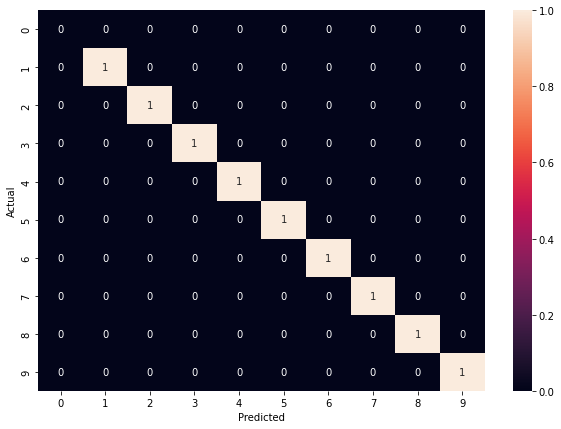

In [67]:
cm_mlp = confusion_matrix(laliga_sc_rf_df["RealPositions"], laliga_sc_rf_df["PredictedPosition"], labels=np.arange(0,10))
plt.figure(figsize=(10,7))
sn.heatmap(cm_mlp, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Random Forest yönteminin normalizasyon yöntemiyle denenmesi:

### "Min Max Scaler" ile Random Forest yöntemi:

In [68]:
from sklearn.preprocessing import MinMaxScaler

min_sc = MinMaxScaler()
m_sc_train_data = min_sc.fit_transform(train_data)
m_sc_test_data = min_sc.transform(test_data)

In [69]:
diff_forest = RandomForestClassifier(n_jobs=10)
diff_forest.fit(m_sc_train_data, train_target)
diff_forest_result = diff_forest.predict(m_sc_test_data)

In [70]:
accuracy_score(test_target, diff_forest_result), recall_score(test_target, diff_forest_result, average="micro"), precision_score(test_target, diff_forest_result, average="weighted")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.22448979591836735, 0.22448979591836735, 0.30775771847200417)